In [1]:
#!pip install kaggle-environments
#!pip install chardet
#!pip install charset-normalizer
#!pip install gym
#!pip install tqdm
#!pip install -U matplotlib

In [1]:
from kaggle_environments import make

import numpy as np
import gym


from Scripts.MCTS import agent_mcts
from Scripts.Deep_Q_Learning import DQN
import matplotlib.pyplot as plt
#from Scripts.training import train_agent,load_agent, train_adversial_agent

from Scripts.test_model import test_agent, new_testing

from Scripts.training import train_agent,save_agent,load_agent
from Scripts.new_training import train_adversial_agent
from tqdm import tqdm

Loading environment lux_ai_s2 failed: No module named 'vec_noise'


# 0. Initialisating the environment

In [2]:
cols = 7
rows = 6
env = make("connectx", configuration={"rows":rows, "columns":cols})

In [3]:
LOAD_MODEL_agent1 = False
LOAD_MODEL_agent2 = False


PATH_TO_LOAD = "models/"
NAME_AGENT_1 = "1v2_ep20.pt"
NAME_AGENT_2 = "2v1_ep20.pt"


if(LOAD_MODEL_agent1):
    agent1 = load_agent(PATH_TO_LOAD+NAME_AGENT_1)
else :
    agent1 = DQN()


if(LOAD_MODEL_agent2):
    agent2 = load_agent(PATH_TO_LOAD+NAME_AGENT_2)
else:
    agent2 = DQN()

# 1. Training against Random

In [4]:
RANDOM_EPOCHS = 100

In [5]:
#agent1 = train_agent(env,agent1,"random",n_player=1,epochs=RANDOM_EPOCHS,display_info=True, save=False)
#agent2 = train_agent(env,agent2,"random",n_player=2,epochs=RANDOM_EPOCHS,display_info=True, save=False)

# 2. Adversarial training

In [7]:
ADVERSARIAL_EPOCHS = 10000
NB_SWITCH = 10

FOLLOW_TRAINING = True
NB_GAMES_TEST = 100

history_random = []
history_MCTS = []
history_negamax = []

In [8]:
for i in range(NB_SWITCH):
    agent1 = train_adversial_agent(env,agent1, agent2,n_player=1,epochs=ADVERSARIAL_EPOCHS,display_info=True)
    agent2 = train_adversial_agent(env,agent2, agent1 ,n_player=2,epochs=ADVERSARIAL_EPOCHS,display_info=True)



In [ ]:
if FOLLOW_TRAINING:
    current_history_random = new_testing(env,agent1,env.agents["random"],n_player=1,nb_games=NB_GAMES_TEST)
    #current_history_MCTS = new_testing(env,agent1,agent_mcts,n_player=1,nb_games=NB_GAMES_TEST)
    current_history_negamax = new_testing(env,agent1,env.agents["negamax"],n_player =1, nb_games=NB_GAMES_TEST)

    history_random.append(current_history_random[1]/NB_GAMES_TEST*100)
    #history_MCTS.append(current_history_MCTS[1]/NB_GAMES_TEST*100)
    history_negamax.append(current_history_negamax[1]/NB_GAMES_TEST*100)

In [ ]:
print('random : ',current_history_random)
print('negamax :',current_history_negamax)

random :  {1: 66, -1: 33, None: 0, 0: 0}
negamax : {1: 4, -1: 95, None: 0, 0: 0}


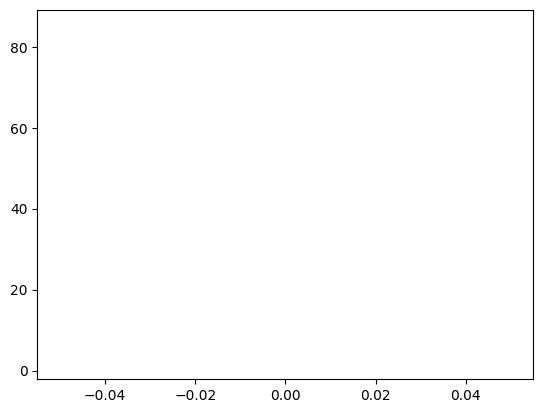

In [12]:
if FOLLOW_TRAINING:
    plt.plot(history_random)
    #plt.plot(history_MCTS)
    plt.plot(history_negamax)
plt.show()

# 3. Testing Agents

In [13]:
NB_GAMES_TEST = 100

### 3.1 Against random

In [14]:
history_random = test_agent(env,agent1,"random",n_player=1,nb_games=NB_GAMES_TEST)
print(history_random)

TypeError: DQN.choose_action() takes 3 positional arguments but 4 were given

### 3.2 Against MCTS

In [ ]:
history_MCTS = test_agent(env,agent1,agent_mcts,n_player=1,nb_games=NB_GAMES_TEST)
plt.plot(history_MCTS)

### 3.3 Against MCTS

In [ ]:
history_negamax = test_agent(env,agent1,"negamax",n_player =1, nb_games=NB_GAMES_TEST)
plt.plot(history_negamax)

# 4. Saving Agents

In [ ]:
SAVE = True
PATH_TO_SAVE = "models/"

NAME1 = "1v2_ep"+ str(NB_SWITCH*ADVERSARIAL_EPOCHS)
NAME2 = "2v1_ep"+ str(NB_SWITCH*ADVERSARIAL_EPOCHS)

In [ ]:
if SAVE :
    save_agent(agent1, path_to_save=PATH_TO_SAVE, name=NAME1, epochs=NB_SWITCH*ADVERSARIAL_EPOCHS)
    save_agent(agent2, path_to_save=PATH_TO_SAVE, name=NAME2, epochs=NB_SWITCH*ADVERSARIAL_EPOCHS)

# 3. Testing efficiency of the training against rd

In [ ]:
EPOCHS = 100
NB_GAMES_TEST = 10

In [ ]:
agent1 = DQN()

for i in range(1):
    agent1 = train_agent(env,agent1,"random",n_player=1,epoch=100,display_info=False)
    current_history = test_agent(env,agent1,"random",n_player=1,nb_games=NB_GAMES_TEST)
    print(current_history)
    history.append(current_history[1]/nb_games_test * 100)
plt.plot(history)

In [ ]:
plt.figure(figsize = (20,20))
plt.title("Neural Network vs Random Player - Trained only against the random player")
plt.xlabel("Training time 100's of games")
plt.ylabel("Wins per 100 games in testing phase")
history.insert(0,50)
plt.plot(history)